# Saeid Search¶

## look for best arch


- Atul Acharya

This notebook shows how to use a simple Keras based neural network for predicting diabetes. A few things implemented:

- a 3-layer NN 
- model checkpointing / saving
- plotting history

In [1]:
import timeit
from keras.models import Model, Sequential
from keras.layers import (
    Input,
    Embedding,
    LSTM,
    Dense,
    concatenate,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
    Activation,
    MaxPooling2D,
)
from keras.utils.np_utils import to_categorical  # convert to one-hot-encoding
from tensorflow.keras.optimizers import RMSprop, Adam

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.datasets import cifar10
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils.vis_utils import plot_model

import tensorflow as tf
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
import matplotlib.image as mpimg
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

############################################################################
numpy.random.seed(110)
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

seed = 42
np.random.seed(seed)

In [3]:
# Defining New Activation functions
############################################################################
def X_1(x):
    return K.pow(x, 1)


get_custom_objects().update({"X_1": Activation(X_1)})
############################################################################
def X_2(x):
    return (K.pow(x, 2)) / 2


get_custom_objects().update({"X_2": Activation(X_2)})
############################################################################
def X_3(x):
    return (K.pow(x, 3)) / 6


get_custom_objects().update({"X_3": Activation(X_3)})
############################################################################
def X_4(x):
    return (K.pow(x, 4)) / 24


get_custom_objects().update({"X_4": Activation(X_4)})
############################################################################
def X_5(x):
    return (K.pow(x, 5)) / 120


get_custom_objects().update({"X_5": Activation(X_5)})
###############################################################################
def X_6(x):
    return (K.pow(x, 6)) / 720


get_custom_objects().update({"X_6": Activation(X_6)})
############################################################################
def X_7(x):
    return (K.pow(x, 7)) / 5040


get_custom_objects().update({"X_7": Activation(X_7)})
############################################################################
def X_8(x):
    return (K.pow(x, 8)) / 40320


get_custom_objects().update({"X_8": Activation(X_8)})
###############################################################################
def X_9(x):
    return (K.pow(x, 8)) / 362880


get_custom_objects().update({"X_9": Activation(X_9)})
###############################################################################

In [4]:
# Define Test Functions


def power_(x, n):
    return np.power(x, n)


###############################################################################
def sigmoid_array(x):
    return 1 / (1 + np.exp(-x))


###############################################################################
def exp_(x):
    return np.exp(x)


###############################################################################
def log_(x):
    return np.log(x)


###############################################################################
def generate_random(shape_1, shape_2):
    temp = np.random.random(shape_1 * shape_2)
    temp1 = temp.reshape(shape_1, shape_2)
    return temp1


###############################################################################
def fun_1(x):
    return 1 / 2 * power_(x, 2) - 5 * sigmoid_array(x)


###############################################################################
def fun_2(x):
    return 6 * power_(x, 5) - 3 * sigmoid_array(x) + exp_(x) - 9 * log_(x)


###############################################################################
def fun_3(x):
    return 22 * power_(x, 20) + sigmoid_array(x) + 2 * exp_(x) + 5 * log_(x)


###############################################################################

In [5]:
# Creates plots for all test functions
def plot_loss(size, in_1, in_2, in_3, in_4, in_5, in_6):

    plt.rcParams.update({"font.size": 16})

    plt.figure(figsize=(20, 10))
    plt.subplot(231)
    training_loss1 = in_1.history["loss"]
    test_loss1 = in_1.history["val_loss"]
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, "r--")
    plt.plot(epoch_count, test_loss1, "b-")
    plt.legend(["Training Loss", "Test Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.ylim(0, size)
    plt.title("Architure 1")

    plt.subplot(232)
    training_loss1 = in_2.history["loss"]
    test_loss1 = in_2.history["val_loss"]
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, "r--")
    plt.plot(epoch_count, test_loss1, "b-")
    plt.legend(["Training Loss", "Test Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.ylim(0, size)
    plt.title("Architure 2")

    plt.subplot(233)
    training_loss1 = in_3.history["loss"]
    test_loss1 = in_3.history["val_loss"]
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, "r--")
    plt.plot(epoch_count, test_loss1, "b-")
    plt.legend(["Training Loss", "Test Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.ylim(0, size)
    plt.title("Architure 3")

    plt.subplot(234)
    training_loss1 = in_4.history["loss"]
    test_loss1 = in_4.history["val_loss"]
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, "r--")
    plt.plot(epoch_count, test_loss1, "b-")
    plt.legend(["Training Loss", "Test Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.ylim(0, size)
    plt.title("Architure 4")

    plt.subplot(235)
    training_loss1 = in_5.history["loss"]
    test_loss1 = in_5.history["val_loss"]
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, "r--")
    plt.plot(epoch_count, test_loss1, "b-")
    plt.legend(["Training Loss", "Test Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.ylim(0, size)
    plt.title("Architure 5")

    plt.subplot(236)
    training_loss1 = in_6.history["loss"]
    test_loss1 = in_6.history["val_loss"]
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, "r--")
    plt.plot(epoch_count, test_loss1, "b-")
    plt.legend(["Training Loss", "Test Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.ylim(0, size)
    plt.title("Our Architure ")

    plt.subplots_adjust(
        top=0.92, bottom=0.08, left=0.0010, right=0.95, hspace=0.3, wspace=0.18
    )

    plt.show()

In [7]:
# Create plots for shape of test function
def plot_shape(in_1, in_2, in_3, in_4, in_5, in_6):

    plt.figure(figsize=(20, 10))
    plt.rcParams.update({"font.size": 16})

    plt.subplot(231)
    plt.scatter(in_1[0], in_1[1])
    plt.scatter(in_1[0], in_1[2])
    plt.title("Architure 1")

    plt.subplot(232)
    plt.scatter(in_2[0], in_2[1])
    plt.scatter(in_2[0], in_2[2])
    plt.title("Architure 2")

    plt.subplot(233)
    plt.scatter(in_3[0], in_3[1])
    plt.scatter(in_3[0], in_3[2])
    plt.title("Architure 3")

    plt.subplot(234)
    plt.scatter(in_4[0], in_4[1])
    plt.scatter(in_4[0], in_4[2])
    plt.title("Architure 4")

    plt.subplot(235)
    plt.scatter(in_5[0], in_5[1])
    plt.scatter(in_5[0], in_5[2])
    plt.title("Architure 5")

    plt.subplot(236)
    plt.scatter(in_6[0], in_6[1])
    plt.scatter(in_6[0], in_6[2])
    plt.title("Our Architure")

    plt.subplots_adjust(
        top=0.92, bottom=0.08, left=0.0010, right=0.95, hspace=0.3, wspace=0.18
    )

    plt.show()

In [8]:
# Creates dataset
dim_train = 1000
dim_test = 200

X_train_temp = generate_random(dim_train, 3)
Y_train_temp = generate_random(dim_train, 3)

X_test_temp = generate_random(dim_test, 3)
Y_test_temp = generate_random(dim_test, 3)


Y_train_temp[:, 0] = fun_1(X_train_temp[:, 0])
Y_train_temp[:, 1] = fun_2(X_train_temp[:, 1])
Y_train_temp[:, 2] = fun_3(X_train_temp[:, 2])


Y_test_temp[:, 0] = fun_1(X_test_temp[:, 0])
Y_test_temp[:, 1] = fun_2(X_test_temp[:, 1])
Y_test_temp[:, 2] = fun_3(X_test_temp[:, 2])

In [9]:
# Hyper perameters
number_epo = 50
input_dim = 1
output_dim = 1

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
import tensorflow as tf

In [12]:
# Example of Dropout on the Sonar Dataset: Hidden Layer
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [13]:
# First Standard Archetecture
model = Sequential()
model.add(Dense(4, input_dim=input_dim, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(output_dim, activation="relu"))
model.add(Dropout(0.1))
# model.summary()
model.compile(loss="mean_squared_error", optimizer="adam")

In [14]:
# Creates plot for loss and trainning functions
def plot_(history):
    training_loss1 = history.history["loss"]
    test_loss1 = history.history["val_loss"]
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, "r--")
    plt.plot(epoch_count, test_loss1, "b-")
    plt.legend(["Training Loss", "Test Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

Run Time : 5.269737


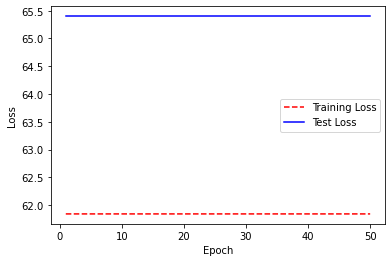

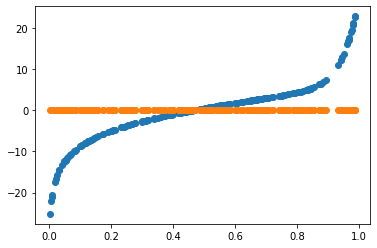

In [15]:
# train traditional model for Function 3
column = 2
X_train = X_train_temp[:, column]
Y_train = Y_train_temp[:, column]
X_test = X_test_temp[:, column]
Y_test = Y_test_temp[:, column]
# F_3_archicture_1_


start = timeit.default_timer()
history = model.fit(
    X_train,
    Y_train,
    epochs=number_epo,
    verbose=0,
    batch_size=10,
    validation_data=(X_test, Y_test),
)
end = timeit.default_timer()
print("Run Time : %f" % (end - start))
plot_(history)
plt.scatter(X_test, Y_test)
predict = model.predict(X_test)
plt.scatter(X_test, predict)

F_3_archicture_1 = [
    X_test,
    Y_test,
    predict,
    history,
]

In [16]:
batch_size = [10]
epochs = [10]
learning_rate = [0.01]
dropout_rate = [0.1, 0.2]
activation_function = ["relu", "tanh", "linear", "sigmoid"]
activation_function_1 = ["relu", "tanh", "linear", "sigmoid"]
activation_function_2 = ["relu", "tanh", "linear", "sigmoid"]

init = ["uniform", "normal"]
neuron1 = [4, 8, 16, 20]
neuron2 = [4, 8, 16, 20]

In [ ]:
def create_model(
    learning_rate,
    dropout_rate,
    activation_function,
    activation_function_1,
    activation_function_2,
    init,
    neuron1,
    neuron2,
):
    model = Sequential()
    model.add(
        Dense(
            neuron1,
            input_dim=1,
            kernel_initializer=init,
            activation=activation_function,
        )
    )
    model.add(Dropout(dropout_rate))
    model.add(
        Dense(
            neuron2,
            input_dim=neuron1,
            kernel_initializer=init,
            activation=activation_function_1,
        )
    )
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation=activation_function_2))

    adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
    return model


# Create the model

model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters

# batch_size = [10,20,40]
# epochs = [10,50,100]
# learning_rate = [0.001,0.01,0.1]
# dropout_rate = [0.0,0.1,0.2]
# activation_function = ['softmax','relu','tanh','linear']
# init = ['uniform','normal','zero']
# neuron1 = [4,8,16]
# neuron2 = [2,4,8]



param_grids = dict(
    batch_size=batch_size,
    epochs=epochs,
    learning_rate=learning_rate,
    dropout_rate=dropout_rate,
    activation_function=activation_function,
    activation_function_1=activation_function_1,
    activation_function_2=activation_function_2,
    init=init,
    neuron1=neuron1,
    neuron2=neuron2,
)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator=model, param_grid=param_grids, cv=KFold(), verbose=0)
grid_result = grid.fit(X_train, Y_train)

# Summarize the results

print("Best : {}, using {}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("{},{} with: {}".format(mean, stdev, param))